# Task 0

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('iris_clusters.csv', sep=';')
df = df.drop(['id'], axis=1)
# df = df[df['sl'] < 10]
df.head()

,pl,pw,sl,sw
0,6.7,3.0,4.6,1.5
1,6.7,2.8,4.6,1.2
2,5.0,3.6,1.6,0.5
3,6.3,3.1,5.9,2.5
4,7.0,2.9,5.7,1.7


# Task 1

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


193

106

1

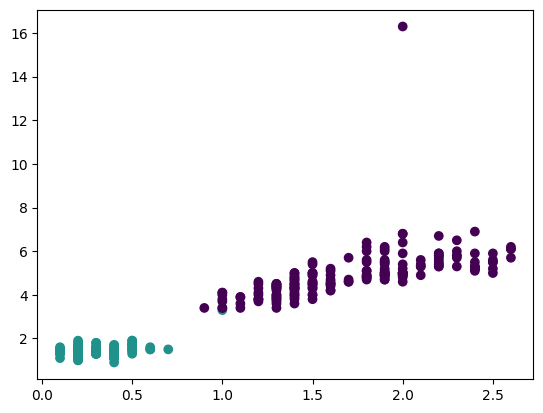

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)


display(np.count_nonzero(kmeans.labels_ == 0))
display(np.count_nonzero(kmeans.labels_ == 1))
display(np.count_nonzero(kmeans.labels_ == 2))
plt.scatter(df['sw'], df['sl'], c=kmeans.labels_, cmap='viridis')

plt.show()

# Task 2

## Rescaling First

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import LocalOutlierFactor

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


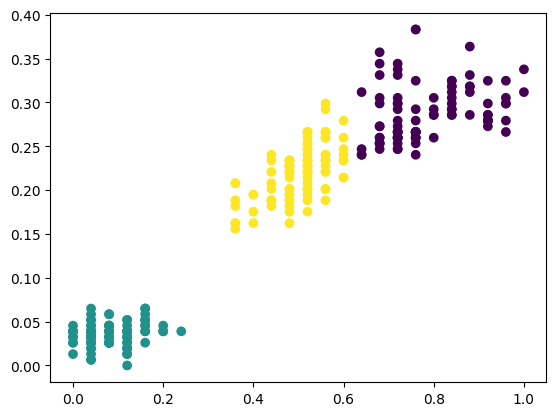

93

100

90

In [5]:
minmax = MinMaxScaler()
minmax_scaled = minmax.fit_transform(df)
lof_outlier = LocalOutlierFactor()
# minmax_scaled = pd.DataFrame(minmax_scaled, columns=['pl', 'pw', 'sl', 'sw'])

outlier_score = lof_outlier.fit_predict(minmax_scaled)
outlier_indices = outlier_score != -1
# print("Outlier indices:", outlier_indices)
minmax_scaled = pd.DataFrame(minmax_scaled[outlier_indices], columns=['pl', 'pw', 'sl', 'sw'])


kmeans.fit(minmax_scaled)
plt.scatter(minmax_scaled['sw'], minmax_scaled['sl'], c=kmeans.labels_, cmap='viridis')
plt.show()

display(np.count_nonzero(kmeans.labels_ == 0))
display(np.count_nonzero(kmeans.labels_ == 1))
display(np.count_nonzero(kmeans.labels_ == 2))

## Removing outliers first

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


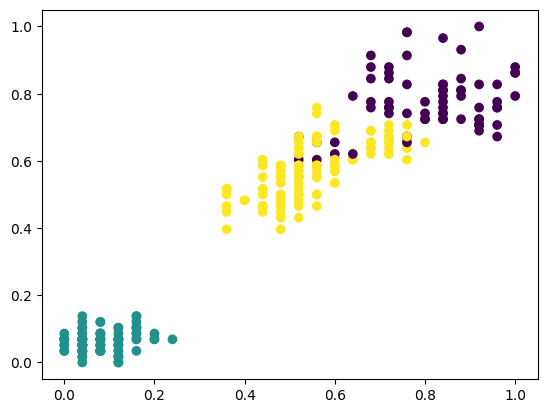

69

97

119

In [6]:
lof_outlier = LocalOutlierFactor()


outlier_score = lof_outlier.fit_predict(df)
outlier_indices = outlier_score != -1

df = pd.DataFrame(df[outlier_indices], columns=['pl', 'pw', 'sl', 'sw'])

minmax = MinMaxScaler()
minmax_scaled = minmax.fit_transform(df)
minmax_scaled = pd.DataFrame(minmax_scaled, columns=['pl', 'pw', 'sl', 'sw'])

kmeans.fit(minmax_scaled)
plt.scatter(minmax_scaled['sw'], minmax_scaled['sl'], c=kmeans.labels_, cmap='viridis')
plt.show()

display(np.count_nonzero(kmeans.labels_ == 0))
display(np.count_nonzero(kmeans.labels_ == 1))
display(np.count_nonzero(kmeans.labels_ == 2))

In [7]:
from sklearn.neighbors import NearestCentroid
clf = NearestCentroid()

clf.fit(minmax_scaled, kmeans.labels_)
clf.centroids_

array([[0.70724638, 0.46837945, 0.77711144, 0.81043478],
       [0.19646539, 0.6452671 , 0.06345539, 0.08082474],
       [0.46098439, 0.32696715, 0.58157056, 0.56739496]])

# Task 3

In [8]:
from sklearn.metrics import davies_bouldin_score

lowest = np.Infinity
lowIndex = -1

for i in range(2, 20):
    kmeans = KMeans(n_clusters=int(i), random_state=1).fit(minmax_scaled)
    labels = kmeans.labels_
    score = davies_bouldin_score(minmax_scaled, labels)
    # print(f"For k = {i}, davies bouldin score:", score)
    if score < lowest:
        lowest = score
        lowIndex = i

print(f"{lowIndex} had the lowest score of {lowest}")

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

2 had the lowest score of 0.4754013639723606


/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


# Task 4

62

97

126

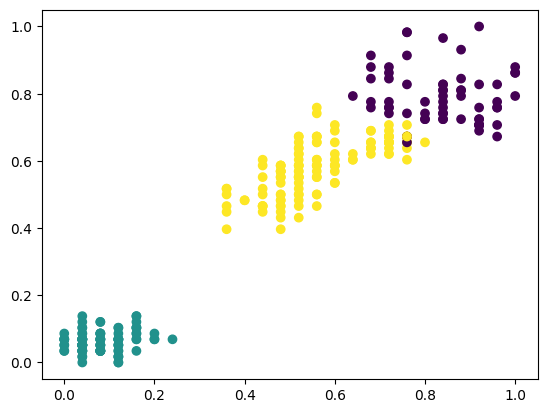

In [9]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(linkage='average', n_clusters=3).fit(minmax_scaled)

plt.scatter(minmax_scaled['sw'], minmax_scaled['sl'], c=clustering.labels_, cmap='viridis')

display(np.count_nonzero((clustering.labels_ == 0)))
display(np.count_nonzero((clustering.labels_ == 1)))
display(np.count_nonzero((clustering.labels_ == 2)))

# Task 5

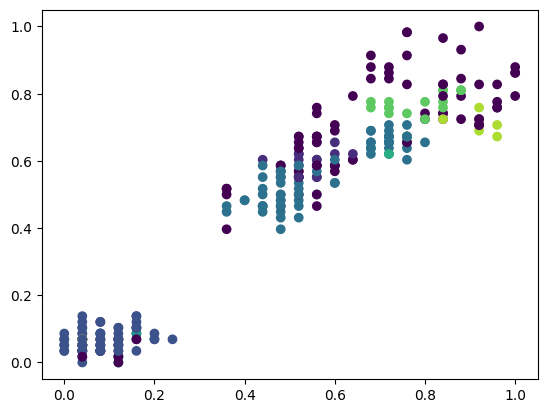

In [10]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps= 0.09, min_samples=5).fit(minmax_scaled)
plt.scatter(minmax_scaled['sw'], minmax_scaled['sl'], c=clustering.labels_, cmap='viridis')

In [11]:
# Plot k-distances
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

def k_distances(X, n=None):
    if type(X) is pd.DataFrame:
        X = X.values
    k=0
    if n == None:
        k=X.shape[1]+2
    else:
        k=n+1
    dist_func = lambda x, y: math.sqrt(np.sum(np.power(x-y, np.repeat(2,x.size))))
    Distances = pd.DataFrame({
        "i": [i//10 for i in range(0, len(X)*len(X))],
        "j": [i%10 for i in range(0, len(X)*len(X))],
        "d": [dist_func(x,y) for x in X for y in X]
    })
    return np.sort([g[1].iloc[k].d for g in iter(Distances.groupby(by="i"))])

# TODO: add your parameters here.
# data -- your normalized dataset (dataframe matrix)
# k    -- k-th neighbour (for distance metric). By default, k=count(features)+1
d = k_distances(
    minmax_scaled
)
plt.plot(d)
# plt.xlim(0, 2000)
plt.ylabel("k-distances")
plt.grid(True)
plt.show()

IndexError: single positional indexer is out-of-bounds